# Sales Data Analysis with NumPy, Pandas, and Matplotlib
Complete EDA following 25 guided tasks — integrating Pandas, NumPy, and Matplotlib.

In [1]:
# ================================
# Task 1: Import required libraries
# ================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Make pandas displays friendlier
pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 140)

In [2]:
# =======================================
# Task 2: Load dataset & display head/tail
# =======================================
# Ensure your sales.csv is in the working directory
df = pd.read_csv("sales_data.csv")

print("First 5 rows:")
display(df.head())
print("Last 5 rows:")
display(df.tail())

First 5 rows:


,order_id,customer_id,product_id,category_english,price,freight_value,payment_type,payment_value,order_purchase_timestamp,order_delivered_customer_date,total_price
0,1001,C011,P174,Fashion,3972.0,141.0,NaN,4113.0,1/7/23 0:00,1/11/23,4113.0
1,1002,C006,P101,Fashion,NaN,107.0,cash,NaN,1/4/23 0:00,1/8/23,NaN
2,1003,C027,P141,Fashion,NaN,108.0,cash,NaN,1/4/23 0:00,1/24/23,NaN
3,1004,C005,P150,Books,2099.0,83.0,NaN,2182.0,1/4/23 0:00,2/1/23,2182.0
4,1005,C009,P189,Electronics,2635.0,33.0,debit_card,2668.0,1/9/23 0:00,NaN,2668.0


Last 5 rows:


,order_id,customer_id,product_id,category_english,price,freight_value,payment_type,payment_value,order_purchase_timestamp,order_delivered_customer_date,total_price
95,1096,C009,P134,Books,NaN,NaN,cash,NaN,1/22/23 0:00,1/28/23,NaN
96,1097,C011,P158,Fashion,3481.0,110.0,upi,3591.0,1/25/23 0:00,1/28/23,3591.0
97,1098,C029,P162,Books,2190.0,107.0,debit_card,2297.0,1/19/23 0:00,1/21/23,2297.0
98,1099,C022,P185,Fashion,1166.0,NaN,NaN,NaN,1/28/23 0:00,1/30/23,NaN
99,1100,C029,P148,Electronics,NaN,142.0,NaN,NaN,1/8/23 0:00,1/10/23,NaN


In [3]:
# ===========================================
# Task 3: Shape & basic info (rows, columns)
# ===========================================
print("\nShape (rows, cols):", df.shape)
print("\nDataFrame info():")
df.info()


Shape (rows, cols): (100, 11)

DataFrame info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       100 non-null    int64  
 1   customer_id                    100 non-null    object 
 2   product_id                     100 non-null    object 
 3   category_english               100 non-null    object 
 4   price                          87 non-null     float64
 5   freight_value                  86 non-null     float64
 6   payment_type                   77 non-null     object 
 7   payment_value                  76 non-null     float64
 8   order_purchase_timestamp       100 non-null    object 
 9   order_delivered_customer_date  90 non-null     object 
 10  total_price                    76 non-null     float64
dtypes: float64(4), int64(1), object(6)
memory usage: 8.7+ KB


In [10]:
# =======================================================
# Task 4: Dtypes & convert date columns to datetime
# (input appears to be 'DD-MM-YYYY HH:MM' format)
# =======================================================
date_cols = ["order_purchase_timestamp", "order_delivered_customer_date"]
for c in date_cols:
    if c in df.columns:
        df[c] = pd.to_datetime(df[c], format="mixed", errors="coerce")

print("\nDtypes after conversion:")
print(df.dtypes)


Dtypes after conversion:
order_id                                  int64
customer_id                              object
product_id                               object
category_english                         object
price                                   float64
freight_value                           float64
payment_type                             object
payment_value                           float64
order_purchase_timestamp         datetime64[ns]
order_delivered_customer_date    datetime64[ns]
total_price                             float64
dtype: object


In [12]:
# ===================================================
# Task 5: Missing values & duplicates (handle them)
# ===================================================
print("\nMissing values per column:")
print(df.isna().sum())

# Example handling:
# - If any critical IDs are missing, drop those rows
critical_cols = ["order_id", "customer_id", "product_id"]
df = df.dropna(subset=[c for c in critical_cols if c in df.columns])

# - For numeric columns, you can impute (median) if needed
num_cols = ["price", "freight_value", "payment_value", "total_price"]
for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")
        if df[c].isna().any():
            df[c] = df[c].fillna(df[c].median())

# Remove exact duplicate rows
before = len(df)
df = df.drop_duplicates()
after = len(df)
print(f"\nRemoved {before - after} duplicate rows (exact duplicates).")

# Optional: remove duplicates by business key (order_id + product_id)
if {"order_id", "product_id"}.issubset(df.columns):
    before = len(df)
    df = df.drop_duplicates(subset=["order_id", "product_id"], keep="first")
    after = len(df)
    print(f"Removed {before - after} duplicates by (order_id, product_id).")


Missing values per column:
order_id                          0
customer_id                       0
product_id                        0
category_english                  0
price                            13
freight_value                    14
payment_type                     23
payment_value                    24
order_purchase_timestamp          0
order_delivered_customer_date    10
total_price                      24
dtype: int64

Removed 0 duplicate rows (exact duplicates).
Removed 0 duplicates by (order_id, product_id).


In [13]:
# =====================================================================
# Task 6: NumPy stats for price & freight_value (mean/median/min/max/std)
# =====================================================================
def describe_numeric(arr, label):
    arr = np.asarray(arr, dtype=float)
    print(f"\nBasic stats for {label}:")
    print(" mean:", np.mean(arr))
    print(" median:", np.median(arr))
    print(" min:", np.min(arr))
    print(" max:", np.max(arr))
    print(" std:", np.std(arr, ddof=1))  # sample std

if "price" in df.columns:
    describe_numeric(df["price"], "price")
if "freight_value" in df.columns:
    describe_numeric(df["freight_value"], "freight_value")


Basic stats for price:
 mean: 2975.41
 median: 3260.0
 min: 277.0
 max: 4952.0
 std: 1370.441299528931

Basic stats for freight_value:
 mean: 86.73
 median: 84.5
 min: 24.0
 max: 148.0
 std: 34.37232413827535


In [14]:
# ============================================================
# Task 7: Derived columns: delivery_days & total_cost
# ============================================================
if {"order_purchase_timestamp", "order_delivered_customer_date"}.issubset(df.columns):
    df["delivery_days"] = (df["order_delivered_customer_date"] - df["order_purchase_timestamp"]).dt.days

if {"price", "freight_value"}.issubset(df.columns):
    df["total_cost"] = df["price"] + df["freight_value"]

In [15]:
# ==============================================================
# Task 8: Extract year/month/day/dayofweek from purchase timestamp
# ==============================================================
if "order_purchase_timestamp" in df.columns:
    df["purchase_year"] = df["order_purchase_timestamp"].dt.year
    df["purchase_month"] = df["order_purchase_timestamp"].dt.month
    df["purchase_day"] = df["order_purchase_timestamp"].dt.day
    df["purchase_dow"] = df["order_purchase_timestamp"].dt.day_name()

In [16]:
# ==========================================================
# Task 9: Top 5 categories by total sales revenue (total_price)
# ==========================================================
if {"category_english", "total_price"}.issubset(df.columns):
    cat_rev = df.groupby("category_english", dropna=False)["total_price"].sum().sort_values(ascending=False)
    print("\nTop 5 categories by total revenue:")
    display(cat_rev.head(5))


Top 5 categories by total revenue:


category_english
Fashion        88566.0
Home           84980.0
Electronics    76774.0
Books          69369.0
Name: total_price, dtype: float64


Most common payment type: nan


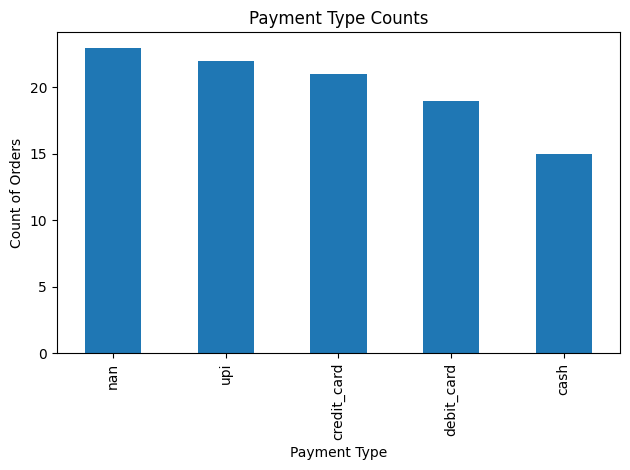

In [17]:
# ==========================================================================
# Task 10: Most common payment type & visualize its proportion (bar chart)
# ==========================================================================
if "payment_type" in df.columns:
    pay_counts = df["payment_type"].value_counts(dropna=False)
    most_common_payment = pay_counts.idxmax()
    print("\nMost common payment type:", most_common_payment)
    pay_counts.plot(kind="bar")
    plt.title("Payment Type Counts")
    plt.xlabel("Payment Type")
    plt.ylabel("Count of Orders")
    plt.tight_layout()
    plt.show()

In [18]:
# ===============================================================
# Task 11: Average delivery time (days) per category (groupby)
# ===============================================================
if {"category_english", "delivery_days"}.issubset(df.columns):
    avg_deliv_per_cat = df.groupby("category_english", dropna=False)["delivery_days"].mean().sort_values()
    print("\nAverage delivery days per category:")
    display(avg_deliv_per_cat)


Average delivery days per category:


category_english
Home           3.416667
Electronics    3.636364
Books          4.666667
Fashion        6.000000
Name: delivery_days, dtype: float64


Monthly total sales:


order_purchase_timestamp
2023-01-26     3650.0
2023-01-27     1239.0
2023-01-28     5985.0
2023-01-29     6104.0
2023-01-30    15464.0
Freq: D, Name: total_price, dtype: float64

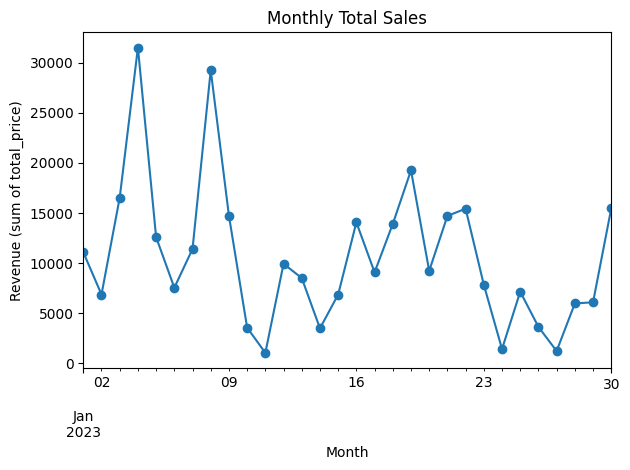

In [20]:
# =====================================================================================
# Task 12: Monthly sales trends (sum of total_price per month) – line chart over time
# =====================================================================================
if "order_purchase_timestamp" in df.columns and "total_price" in df.columns:
    monthly = (
        df.set_index("order_purchase_timestamp")["total_price"].resample("D").sum().sort_index()
    )
    print("\nMonthly total sales:")
    display(monthly.tail())

    monthly.plot(kind="line", marker="o")
    plt.title("Monthly Total Sales")
    plt.xlabel("Month")
    plt.ylabel("Revenue (sum of total_price)")
    plt.tight_layout()
    plt.show()

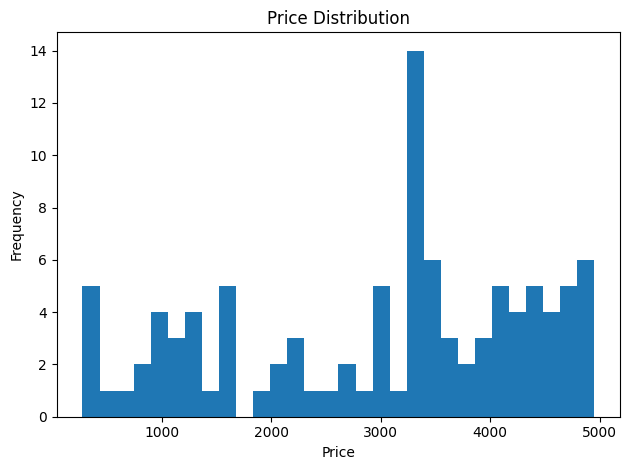

In [21]:
# ========================================================
# Task 13: Histogram for product price distribution
# ========================================================
if "price" in df.columns:
    df["price"].plot(kind="hist", bins=30)
    plt.title("Price Distribution")
    plt.xlabel("Price")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

/var/folders/bj/3vg2xkms7sx_964f4zt1gg1r0000gn/T/ipykernel_16472/3883421697.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=top_cats, vert=True, showfliers=False)


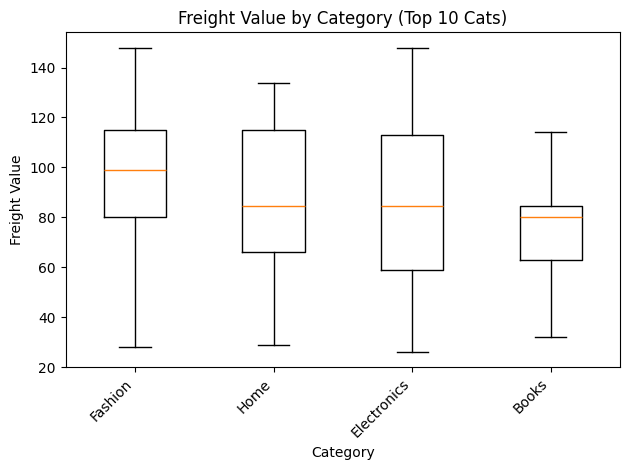

In [22]:
# =========================================================================
# Task 14: Boxplot of freight_value across categories (may need filtering)
# =========================================================================
if {"category_english", "freight_value"}.issubset(df.columns):
    # For readability, restrict to top N categories by count
    top_cats = df["category_english"].value_counts().head(10).index
    df_top = df[df["category_english"].isin(top_cats)]
    # Prepare data for boxplot in category order
    data = [df_top.loc[df_top["category_english"] == c, "freight_value"].dropna().values for c in top_cats]
    plt.boxplot(data, labels=top_cats, vert=True, showfliers=False)
    plt.title("Freight Value by Category (Top 10 Cats)")
    plt.xlabel("Category")
    plt.ylabel("Freight Value")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

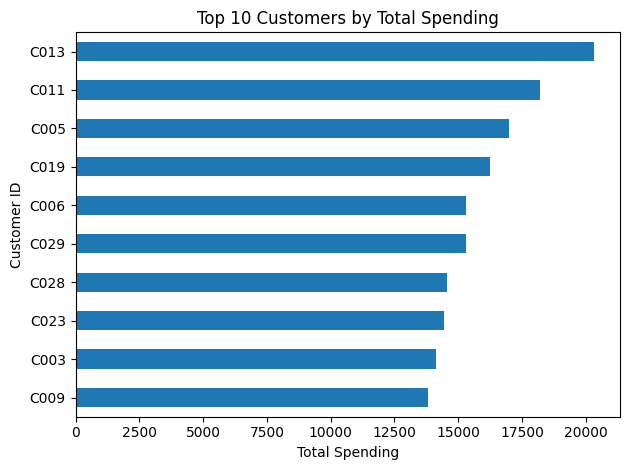

In [23]:
# ============================================================================
# Task 15: Top 10 customers by total spending – horizontal bar chart
# ============================================================================
if {"customer_id", "total_price"}.issubset(df.columns):
    cust_spend = df.groupby("customer_id")["total_price"].sum().sort_values(ascending=False).head(10)
    cust_spend.sort_values().plot(kind="barh")
    plt.title("Top 10 Customers by Total Spending")
    plt.xlabel("Total Spending")
    plt.ylabel("Customer ID")
    plt.tight_layout()
    plt.show()


Correlation matrix:


,price,freight_value,total_price
price,1.000000,-0.039385,0.921421
freight_value,-0.039385,1.000000,-0.027034
total_price,0.921421,-0.027034,1.000000


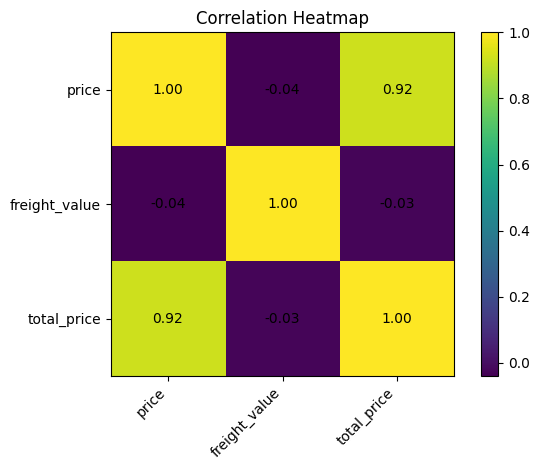

In [24]:
# =========================================================================================
# Task 16: Correlation between price, freight_value, total_price & visualize (matplotlib)
# =========================================================================================
cols_for_corr = [c for c in ["price", "freight_value", "total_price"] if c in df.columns]
if len(cols_for_corr) >= 2:
    corr = df[cols_for_corr].corr()
    print("\nCorrelation matrix:")
    display(corr)

    fig, ax = plt.subplots()
    cax = ax.imshow(corr.values, interpolation="nearest")
    ax.set_xticks(range(len(cols_for_corr)))
    ax.set_yticks(range(len(cols_for_corr)))
    ax.set_xticklabels(cols_for_corr, rotation=45, ha="right")
    ax.set_yticklabels(cols_for_corr)
    for i in range(len(cols_for_corr)):
        for j in range(len(cols_for_corr)):
            ax.text(j, i, f"{corr.values[i, j]:.2f}", ha="center", va="center")
    plt.title("Correlation Heatmap")
    fig.colorbar(cax)
    plt.tight_layout()
    plt.show()

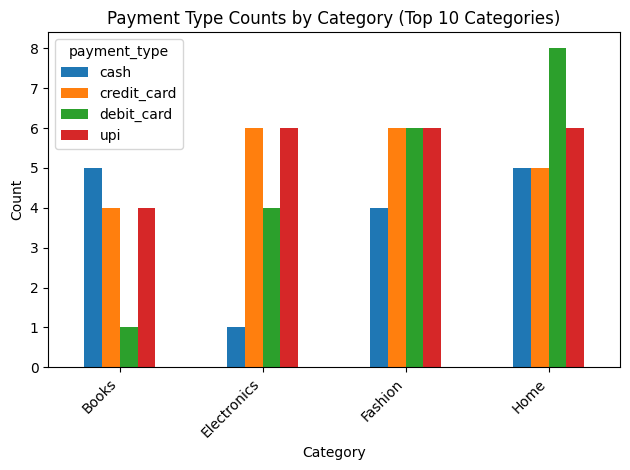

In [25]:
# ==================================================================================
# Task 17: Payment types vary by category – grouped bar plot (pivoted counts)
# ==================================================================================
if {"category_english", "payment_type"}.issubset(df.columns):
    pt = pd.crosstab(df["category_english"], df["payment_type"])
    # For visibility, restrict to top categories by total count
    top_cat_grp = df["category_english"].value_counts().head(10).index
    pt_top = pt.loc[pt.index.intersection(top_cat_grp)].sort_index()
    pt_top.plot(kind="bar")
    plt.title("Payment Type Counts by Category (Top 10 Categories)")
    plt.xlabel("Category")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

In [26]:
# =========================================================================================
# Task 18: NumPy array of total_price and compute percentiles (25th, 50th, 75th)
# =========================================================================================
if "total_price" in df.columns:
    tp = df["total_price"].to_numpy(dtype=float)
    p25, p50, p75 = np.percentile(tp, [25, 50, 75])
    print("\nTotal Price Percentiles:")
    print(" 25th:", p25, " 50th:", p50, " 75th:", p75)


Total Price Percentiles:
 25th: 2295.75  50th: 3572.0  75th: 4130.0


In [27]:
# ====================================================================================
# Task 19: Orders with exceptionally high total_price (above 95th percentile)
# ====================================================================================
high_spend_df = None
if "total_price" in df.columns:
    p95 = np.percentile(df["total_price"], 95)
    high_spend_df = df[df["total_price"] > p95].copy()
    print(f"\nOrders above 95th percentile (>{p95:.2f}) of total_price:")
    display(high_spend_df.head(10))


Orders above 95th percentile (>4856.00) of total_price:


,order_id,customer_id,product_id,category_english,price,freight_value,payment_type,payment_value,order_purchase_timestamp,order_delivered_customer_date,total_price,delivery_days,total_cost,purchase_year,purchase_month,purchase_day,purchase_dow
15,1016,C024,P178,Books,4944.0,70.0,credit_card,5014.0,2023-01-07,2023-01-11,5014.0,4.0,5014.0,2023,1,7,Saturday
16,1017,C017,P155,Electronics,4859.0,58.0,upi,4917.0,2023-01-20,2023-01-22,4917.0,2.0,4917.0,2023,1,20,Friday
35,1036,C023,P189,Electronics,4952.0,38.0,debit_card,4990.0,2023-01-18,2023-01-22,4990.0,4.0,4990.0,2023,1,18,Wednesday
61,1062,C003,P152,Books,4813.0,114.0,NaN,4927.0,2023-01-03,2023-01-09,4927.0,6.0,4927.0,2023,1,3,Tuesday
63,1064,C007,P125,Home,4783.0,111.0,debit_card,4894.0,2023-01-04,2023-01-06,4894.0,2.0,4894.0,2023,1,4,Wednesday


In [28]:
# ============================================================
# Task 20: Summarize key insights (auto-print 5 observations)
# ============================================================
insights = []

# 1) Top category by revenue
if {"category_english", "total_price"}.issubset(df.columns) and not df.empty:
    top_cat = df.groupby("category_english")["total_price"].sum().idxmax()
    insights.append(f"Category with highest revenue: {top_cat}")

# 2) Most common payment type
if "payment_type" in df.columns and not df["payment_type"].dropna().empty:
    insights.append(f"Most used payment type: {df['payment_type'].value_counts().idxmax()}")

# 3) Average delivery days overall
if "delivery_days" in df.columns and df["delivery_days"].notna().any():
    insights.append(f"Average delivery time: {df['delivery_days'].mean():.2f} days")

# 4) Correlation hint: freight vs total_price
if {"freight_value", "total_price"}.issubset(df.columns):
    corr_f_tp = df[["freight_value", "total_price"]].corr().iloc[0, 1]
    insights.append(f"Corr(freight_value, total_price): {corr_f_tp:.2f}")

# 5) High-value order share
if "total_price" in df.columns:
    p95 = np.percentile(df["total_price"], 95)
    share_high = (df["total_price"] > p95).mean()
    insights.append(f"Share of orders above 95th percentile: {share_high*100:.2f}%")

print("\n— Key Insights —")
for i, s in enumerate(insights[:5], 1):
    print(f"{i}. {s}")



— Key Insights —
1. Category with highest revenue: Fashion
2. Most used payment type: upi
3. Average delivery time: 4.42 days
4. Corr(freight_value, total_price): -0.03
5. Share of orders above 95th percentile: 5.00%


In [29]:
# ==========================================================================================
# Task 21: Top 3 product categories contributing most to total revenue
# ==========================================================================================
if {"category_english", "total_price"}.issubset(df.columns):
    top3_rev = df.groupby("category_english")["total_price"].sum().sort_values(ascending=False).head(3)
    print("\nTop 3 revenue-contributing categories:")
    display(top3_rev)


Top 3 revenue-contributing categories:


category_english
Fashion        88566.0
Home           84980.0
Electronics    76774.0
Name: total_price, dtype: float64

In [30]:
# ==========================================================================================
# Task 22: Do higher shipping costs correlate with delayed deliveries?
# - Check correlation between freight_value and delivery_days
# ==========================================================================================
if {"freight_value", "delivery_days"}.issubset(df.columns):
    sub = df[["freight_value", "delivery_days"]].dropna()
    if len(sub) > 1:
        corr_fd = sub.corr().iloc[0, 1]
        print(f"\nCorrelation (freight_value vs delivery_days): {corr_fd:.2f}")
        # Optional scatter (uncomment if you want to eyeball relation)
        # sub.plot(kind="scatter", x="freight_value", y="delivery_days")
        # plt.title("Freight vs Delivery Days")
        # plt.tight_layout()
        # plt.show()
    else:
        print("\nNot enough data to compute correlation for freight_value vs delivery_days.")


Correlation (freight_value vs delivery_days): -0.08


In [31]:
# ==========================================================================================
# Task 23: Which months have the highest number of orders?
# ==========================================================================================
if "order_purchase_timestamp" in df.columns:
    orders_per_month = df.set_index("order_purchase_timestamp").resample("M")["order_id"].nunique()
    top_months = orders_per_month.sort_values(ascending=False).head(5)
    print("\nTop months by unique orders:")
    display(top_months)
    # Discussion: Use your business calendar to map these peaks to seasonal promos/festivals.


Top months by unique orders:


/var/folders/bj/3vg2xkms7sx_964f4zt1gg1r0000gn/T/ipykernel_16472/835346459.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  orders_per_month = df.set_index("order_purchase_timestamp").resample("M")["order_id"].nunique()


order_purchase_timestamp
2023-01-31    100
Freq: ME, Name: order_id, dtype: int64


Average Order Value (AOV) by payment type:


payment_type
upi            3721.500000
debit_card     3307.421053
credit_card    3095.809524
cash           2480.866667
Name: total_price, dtype: float64

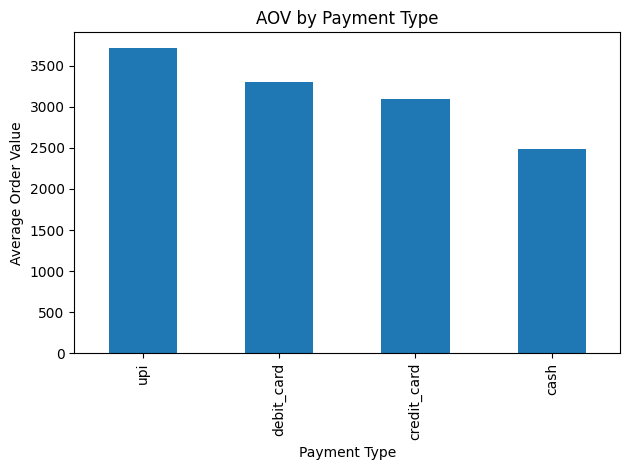

In [32]:
# ==========================================================================================
# Task 24: Compare AOV between different payment types
# ==========================================================================================
if {"payment_type", "total_price"}.issubset(df.columns):
    aov_by_pay = df.groupby("payment_type")["total_price"].mean().sort_values(ascending=False)
    print("\nAverage Order Value (AOV) by payment type:")
    display(aov_by_pay)
    aov_by_pay.plot(kind="bar")
    plt.title("AOV by Payment Type")
    plt.xlabel("Payment Type")
    plt.ylabel("Average Order Value")
    plt.tight_layout()
    plt.show()


Top 5 repeat customers (by unique orders):


customer_id
C005    7
C013    6
C029    5
C004    5
C028    5
Name: order_id, dtype: int64

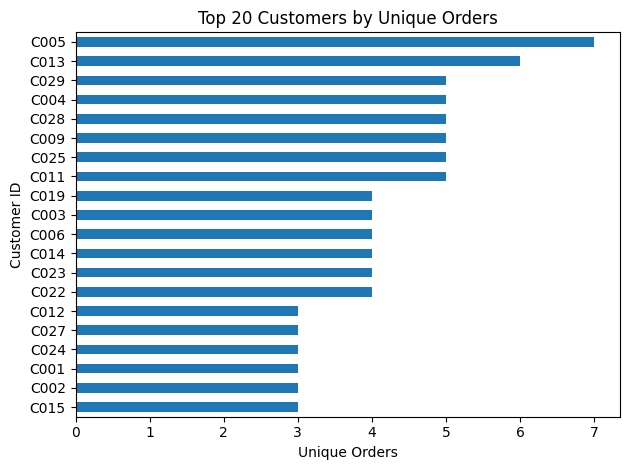

In [33]:
# ==========================================================================================
# Task 25: Customer purchase frequency – unique orders per customer; top repeat customers
# ==========================================================================================
if {"order_id", "customer_id"}.issubset(df.columns):
    cust_orders = df.groupby("customer_id")["order_id"].nunique().sort_values(ascending=False)
    print("\nTop 5 repeat customers (by unique orders):")
    display(cust_orders.head(5))

    # Optional visualization
    cust_orders.head(20).sort_values().plot(kind="barh")
    plt.title("Top 20 Customers by Unique Orders")
    plt.xlabel("Unique Orders")
    plt.ylabel("Customer ID")
    plt.tight_layout()
    plt.show()
